Scripts for Calibration of Cernox Sensors
---------------------------------------

Make a copy of this notebook for an other run.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.interpolate import splrep, splev
from zcalib import read_curve, convert_res, compare_calib, make_calib, logrange, Sensor, CalibRun, nplog, npexp

In [8]:
run = CalibRun([
        Sensor(3, 'X75610'), # the reference sensor must be the first
        Sensor(1, 'X133982', 'CX-1050-SD'),
        Sensor(2, 'X137461', 'CX-1030-SD'),
        Sensor(4, 'X133928', 'CX-1050-SD'),
        Sensor(5, 'X131824', 'CX-1050-CU'),
        Sensor(6, 'X132254', 'CX-1050-SD'),
    ],
    t_points = (1.0, 1.2) + logrange(1.4, 310, n=195) + (330,),  # the points to be used in the cal file
    # t_points = (1.38, 1.42, 1.51) + logrange(1.55, 288, n=57) + (302,310),  # the points to be used in the cal file
    caldate = '2018-11-22',  # the first measuring day!
    logT = False,
    logR = True,
    calib_data_file = '/home/l_samenv/sea/calib_scripts/calib_data/calib%s_p%d_c%d.dat',
    outputpath='%s/%s.340')
# smooth depends on number of measured points (1e-7 for 60, 0.8e-7 for 48 and 0.4e-7 for 24 points)
run.make(diflim=0.001, smoothref=1e-7, smoothtst=0.4e-7)

('lsdat', 'READ /afs/psi.ch/project/SampleEnvironment/SE_internal/Thermometer_calibs/2012/73027 Cernox 5/X75610.dat')
('zdat', 'READ /home/l_samenv/sea/tcl/calib_data/calib2018-11-22_p0_c1.dat')
('zdat', 'READ /home/l_samenv/sea/tcl/calib_data/calib2018-11-22_p1_c1.dat')
('zdat', 'READ /home/l_samenv/sea/tcl/calib_data/calib2018-11-22_p2_c1.dat')
{'selected': 0, 'averaged': 25}
('zdat', 'READ /home/l_samenv/sea/tcl/calib_data/calib2018-11-22_p0_c2.dat')
('zdat', 'READ /home/l_samenv/sea/tcl/calib_data/calib2018-11-22_p1_c2.dat')
('zdat', 'READ /home/l_samenv/sea/tcl/calib_data/calib2018-11-22_p2_c2.dat')
{'selected': 0, 'averaged': 25}
('zdat', 'READ /home/l_samenv/sea/tcl/calib_data/calib2018-11-22_p0_c4.dat')
('zdat', 'READ /home/l_samenv/sea/tcl/calib_data/calib2018-11-22_p1_c4.dat')
('zdat', 'READ /home/l_samenv/sea/tcl/calib_data/calib2018-11-22_p2_c4.dat')
{'selected': 0, 'averaged': 25}
('zdat', 'READ /home/l_samenv/sea/tcl/calib_data/calib2018-11-22_p0_c5.dat')
('zdat', 'READ /

('z340', 'READ 2018-11-22/X133982.340')
('z340', 'READ 2018-11-20/X133982.340')
('z340', 'READ 2018-11-22/X133928.340')
('z340', 'READ 2018-11-20/X133928.340')
('z340', 'READ 2018-11-22/X131824.340')
('z340', 'READ 2018-11-20/X131824.340')
('z340', 'READ 2018-11-22/X132254.340')
('z340', 'READ 2018-11-20/X132254.340')
('z340', 'READ 2018-11-22/X137461.340')
('z340', 'READ 2018-11-20/X137461.340')


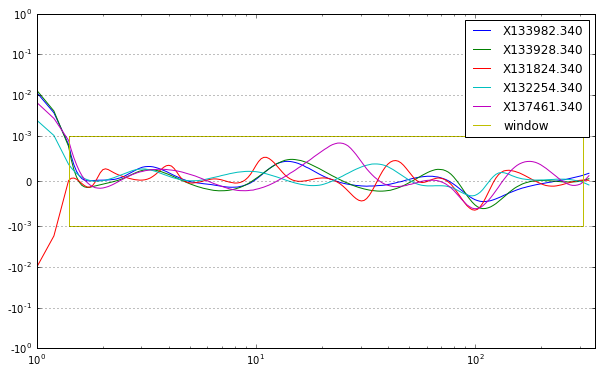

In [9]:
# compare known sensors (skip if not applicable)
plt.figure(figsize=(10, 6))
tmin,tmax,dmax=1.4,310,0.001
testlist = (('X133982', 'z340'),('X133928', 'z340'),('X131824', 'z340'),('X132254', 'z340'),('X137461', 'z340'))
for sensno, kind in testlist:
    r0, t0 = read_curve('2018-11-22/%s.340' % sensno, 'z340')
    r1, t1 = read_curve('2018-11-20/%s.340' % sensno, kind)
    diff = compare_calib(r1, t1, r0, t0)
    plt.plot(t0, diff, '-')
plt.plot([tmin,tmax,tmax,tmin,tmin], [-dmax,-dmax,dmax,dmax,-dmax], '-')
plt.legend([sensno + "." + kind[-3:] for sensno, kind in testlist] + ["window"])
plt.xscale('log')
plt.yscale('symlog',linthreshy=dmax)
plt.grid(True, axis='y')
plt.axis([1.0,350,-1,1])
plt.show()

('z340', 'READ 2018-11-22/X133982.340')
('zdat', 'READ /home/l_samenv/sea/tcl/calib_data/calib2018-11-22_p0_c1.dat')
('zdat', 'READ /home/l_samenv/sea/tcl/calib_data/calib2018-11-22_p1_c1.dat')
('zdat', 'READ /home/l_samenv/sea/tcl/calib_data/calib2018-11-22_p2_c1.dat')


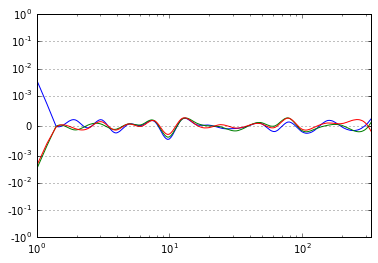

('z340', 'READ 2018-11-22/X137461.340')
('zdat', 'READ /home/l_samenv/sea/tcl/calib_data/calib2018-11-22_p0_c2.dat')
('zdat', 'READ /home/l_samenv/sea/tcl/calib_data/calib2018-11-22_p1_c2.dat')
('zdat', 'READ /home/l_samenv/sea/tcl/calib_data/calib2018-11-22_p2_c2.dat')


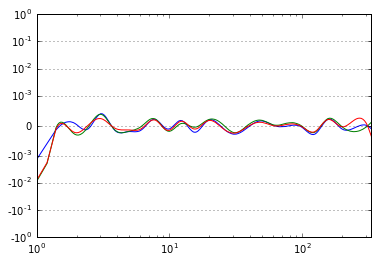

('z340', 'READ 2018-11-22/X133928.340')
('zdat', 'READ /home/l_samenv/sea/tcl/calib_data/calib2018-11-22_p0_c4.dat')
('zdat', 'READ /home/l_samenv/sea/tcl/calib_data/calib2018-11-22_p1_c4.dat')
('zdat', 'READ /home/l_samenv/sea/tcl/calib_data/calib2018-11-22_p2_c4.dat')


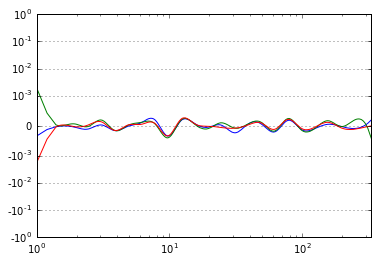

('z340', 'READ 2018-11-22/X131824.340')
('zdat', 'READ /home/l_samenv/sea/tcl/calib_data/calib2018-11-22_p0_c5.dat')
('zdat', 'READ /home/l_samenv/sea/tcl/calib_data/calib2018-11-22_p1_c5.dat')
('zdat', 'READ /home/l_samenv/sea/tcl/calib_data/calib2018-11-22_p2_c5.dat')


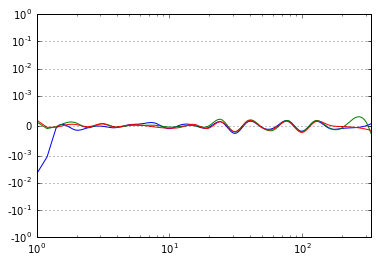

('z340', 'READ 2018-11-22/X132254.340')
('zdat', 'READ /home/l_samenv/sea/tcl/calib_data/calib2018-11-22_p0_c6.dat')
('zdat', 'READ /home/l_samenv/sea/tcl/calib_data/calib2018-11-22_p1_c6.dat')
('zdat', 'READ /home/l_samenv/sea/tcl/calib_data/calib2018-11-22_p2_c6.dat')


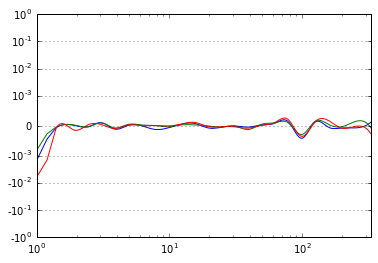

In [4]:
# compare calibration files from points 0,1,2
# with the optimized (average or selection of best)

for sensor in run.sensors:
    r0, t0 = read_curve(sensor.outputpath, sensor.outputkind)
    plt.figure()
    dif = [0,0,0]
    for j in range(3):
        rr, rt = read_curve(sensor.caldat_file[j], 'zdat')
        rc, tc = make_calib(run.rref, run.tref, rr, rt, run.t_points)
        dif[j] = compare_calib(r0, t0, rc, tc)
        plt.plot(t0, dif[j], '-')
    plt.xscale('log')
    plt.yscale('symlog', linthreshy=0.001)
    plt.grid(True, axis='y')
    plt.axis([min(t0),max(t0),-1,1])
    #plt.legend(['dif1','dif2','dif3','est'])
    plt.show()